<a href="https://colab.research.google.com/github/khaja1233/Trader-Sentiment-Analysis-/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [3]:
from google.colab import files
uploaded = files.upload()


Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [391]:
  import os
  os.listdir()



['.config',
 'app.py',
 'fear_greed_index.csv',
 'historical_data.csv',
 'daily_data_dashboard.csv',
 'trader_summary.csv',
 'sample_data']

In [392]:
!pip install pandas seaborn scikit-learn


In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)


In [394]:
import numpy as np
print(np.__version__)



2.0.2


In [395]:
sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")


In [396]:
sentiment.head()


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [397]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [398]:
print("Sentiment Dataset Shape:", sentiment.shape)
print("Trades Dataset Shape:", trades.shape)


Sentiment Dataset Shape: (2644, 4)
Trades Dataset Shape: (211224, 16)


In [399]:
sentiment.info()
trades.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-nu

In [400]:
print("Sentiment Missing Values:\n", sentiment.isnull().sum())
print("\nTrades Missing Values:\n", trades.isnull().sum())



Sentiment Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [401]:
print("Sentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())


Sentiment Duplicates: 0
Trades Duplicates: 0


In [402]:
trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True
)



In [403]:
sentiment['date'] = pd.to_datetime(sentiment['date'])


In [404]:
trades['date'] = trades['Timestamp IST'].dt.date


In [405]:
trades['date'] = trades['Timestamp IST'].dt.normalize()
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.normalize()



In [406]:

print("Sentiment Date Range:", sentiment['date'].min(), "to", sentiment['date'].max())
print("Trade Date Range:", trades['date'].min(), "to", trades['date'].max())


Sentiment Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Trade Date Range: 2023-05-01 00:00:00 to 2025-05-01 00:00:00


In [407]:




print(trades['date'].dtype)
print(sentiment['date'].dtype)


datetime64[ns]
datetime64[ns]


In [408]:
daily_pnl = (
    trades
    .groupby(['Account', 'date'])['Closed PnL']
    .sum()
    .reset_index()
)


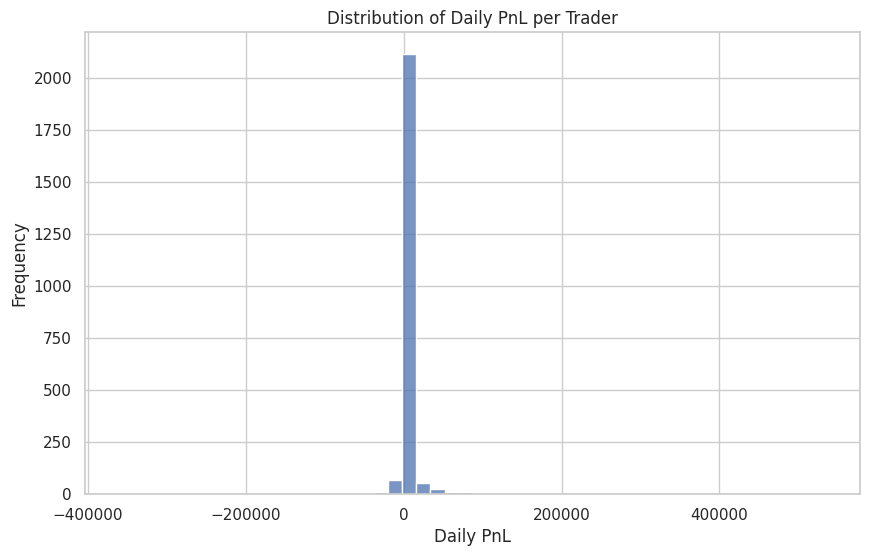

In [409]:
sns.histplot(daily_pnl['Closed PnL'], bins=50)
plt.title("Distribution of Daily PnL per Trader")
plt.xlabel("Daily PnL")
plt.ylabel("Frequency")
plt.show()


In [410]:
trades['win'] = trades['Closed PnL'] > 0

win_rate = (
    trades
    .groupby('Account')['win']
    .mean()
    .reset_index()
)

win_rate.rename(columns={'win': 'win_rate'}, inplace=True)


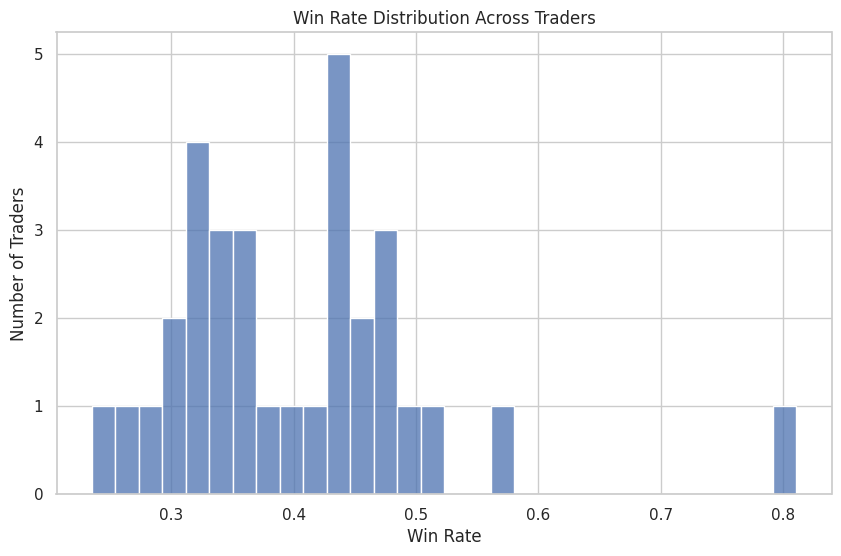

In [411]:
sns.histplot(win_rate['win_rate'], bins=30)
plt.title("Win Rate Distribution Across Traders")
plt.xlabel("Win Rate")
plt.ylabel("Number of Traders")
plt.show()


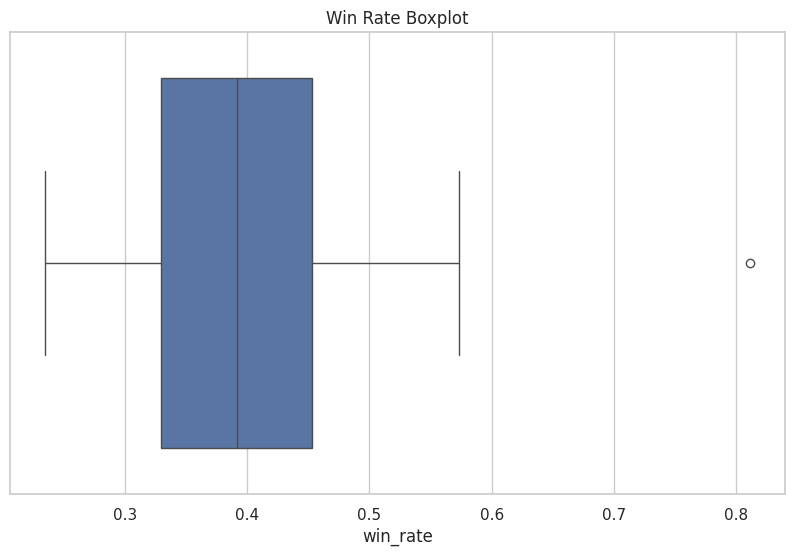

In [412]:
sns.boxplot(x=win_rate['win_rate'])
plt.title("Win Rate Boxplot")
plt.show()


In [413]:
avg_trade_size = (
    trades
    .groupby('Account')['Size USD']
    .mean()
    .reset_index()
)

avg_trade_size.rename(columns={'Size USD': 'avg_trade_size_usd'}, inplace=True)


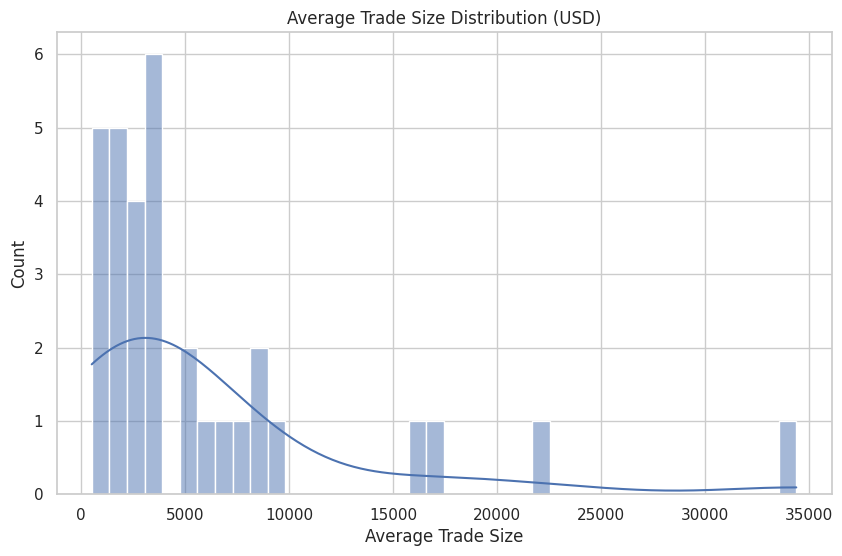

In [414]:
sns.histplot(avg_trade_size['avg_trade_size_usd'], bins=40, kde=True)
plt.title("Average Trade Size Distribution (USD)")
plt.xlabel("Average Trade Size")
plt.show()


In [415]:
trades_per_day = (
    trades
    .groupby(['Account', 'date'])
    .size()
    .reset_index(name='trade_count')
)


In [416]:
account_frequency = trades.groupby('Account').size().reset_index(name='total_trades')


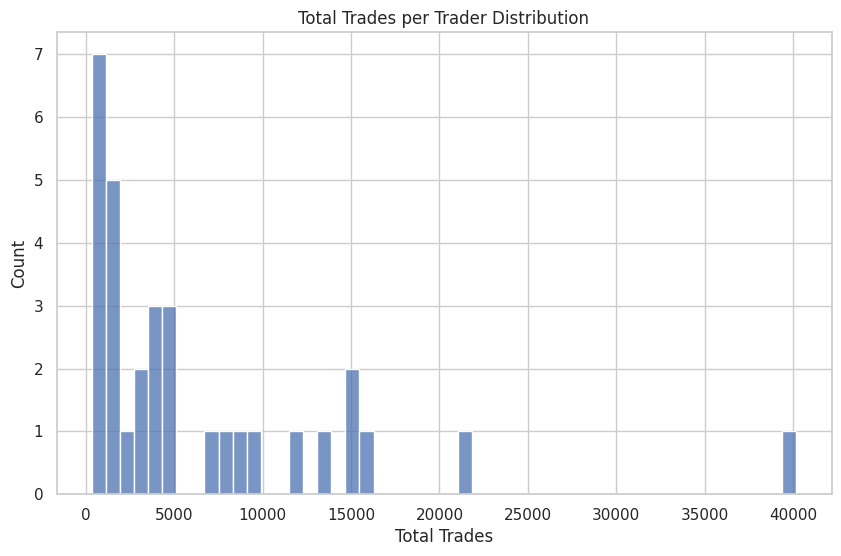

In [417]:
sns.histplot(account_frequency['total_trades'], bins=50)
plt.title("Total Trades per Trader Distribution")
plt.xlabel("Total Trades")
plt.show()


In [418]:
trades['Side'].value_counts()


,count
Side,
SELL,108528
BUY,102696


In [419]:
long_short = (
    trades
    .groupby(['Account', 'Side'])
    .size()
    .unstack(fill_value=0)
)

# Calculate long ratio
long_short['long_ratio'] = long_short['BUY'] / (
    long_short['BUY'] + long_short['SELL']
)

long_short.reset_index(inplace=True)


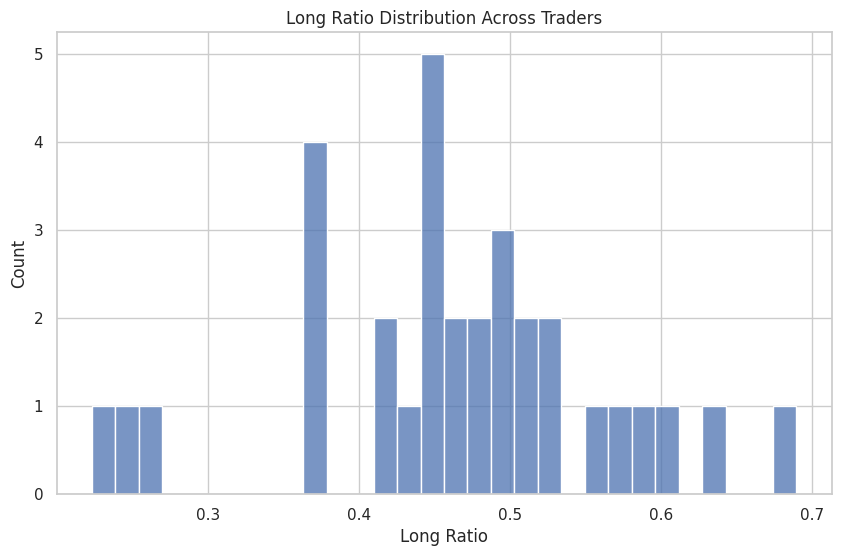

In [420]:
sns.histplot(long_short['long_ratio'], bins=30)
plt.title("Long Ratio Distribution Across Traders")
plt.xlabel("Long Ratio")
plt.show()


In [421]:
daily_data = daily_pnl.merge(
    sentiment[['date', 'classification']],
    on='date',
    how='left'
)


In [422]:
daily_data['classification'].isnull().sum()


np.int64(1)

In [423]:
daily_data = daily_data.dropna(subset=['classification'])


In [424]:
daily_data['classification'].isnull().sum()

np.int64(0)

In [425]:
sentiment_pnl = (
    daily_data
    .groupby('classification')['Closed PnL']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
)

sentiment_pnl


,classification,mean,median,std,count
0,Extreme Fear,4619.439053,218.377399,29534.839183,160
1,Extreme Greed,5161.922644,418.319862,27496.863832,526
2,Fear,5328.818161,107.892532,31659.771538,630
3,Greed,3318.100730,158.214922,30599.040173,648
4,Neutral,3438.618818,167.551743,17447.863645,376


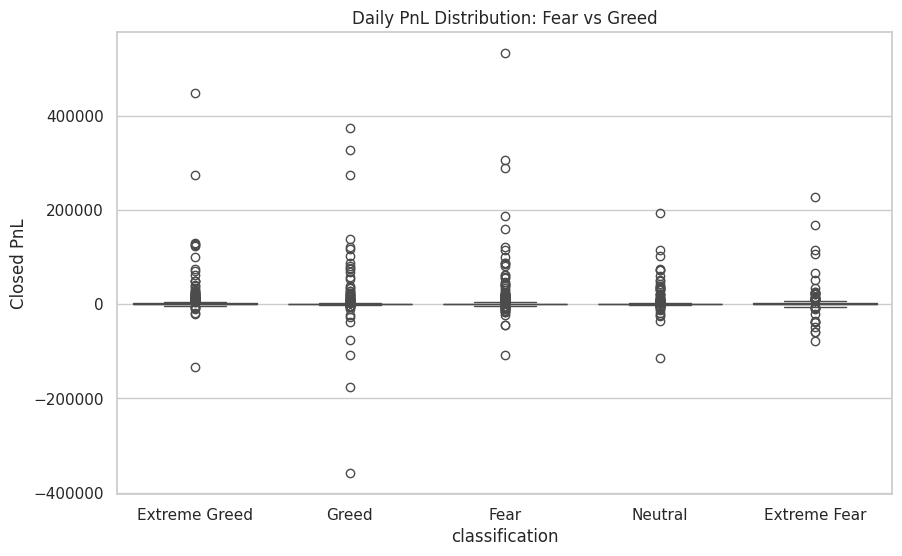

In [426]:
sns.boxplot(x='classification', y='Closed PnL', data=daily_data)
plt.title("Daily PnL Distribution: Fear vs Greed")
plt.show()


In [427]:
trades['win'] = trades['Closed PnL'] > 0


In [428]:
trade_sentiment = trades.merge(
    sentiment[['date','classification']],
    on='date',
    how='left'
)


In [429]:
win_by_sentiment = (
    trade_sentiment
    .groupby('classification')['win']
    .mean()
    .reset_index()
)

win_by_sentiment


,classification,win
0,Extreme Fear,0.370607
1,Extreme Greed,0.464943
2,Fear,0.420768
3,Greed,0.384828
4,Neutral,0.396991


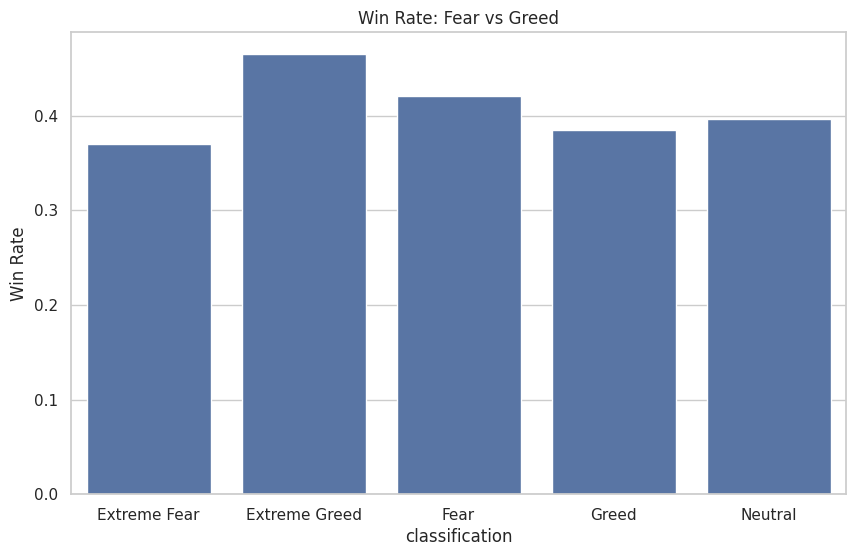

In [430]:
sns.barplot(x='classification', y='win', data=win_by_sentiment)
plt.title("Win Rate: Fear vs Greed")
plt.ylabel("Win Rate")
plt.show()


In [431]:
volatility_proxy = (
    daily_data
    .groupby('classification')['Closed PnL']
    .std()
    .reset_index()
)

volatility_proxy


,classification,Closed PnL
0,Extreme Fear,29534.839183
1,Extreme Greed,27496.863832
2,Fear,31659.771538
3,Greed,30599.040173
4,Neutral,17447.863645


In [432]:
freq_sentiment = (
    trade_sentiment
    .groupby(['classification'])
    .size()
    .reset_index(name='trade_count')
)

freq_sentiment


,classification,trade_count
0,Extreme Fear,21400
1,Extreme Greed,39992
2,Fear,61837
3,Greed,50303
4,Neutral,37686


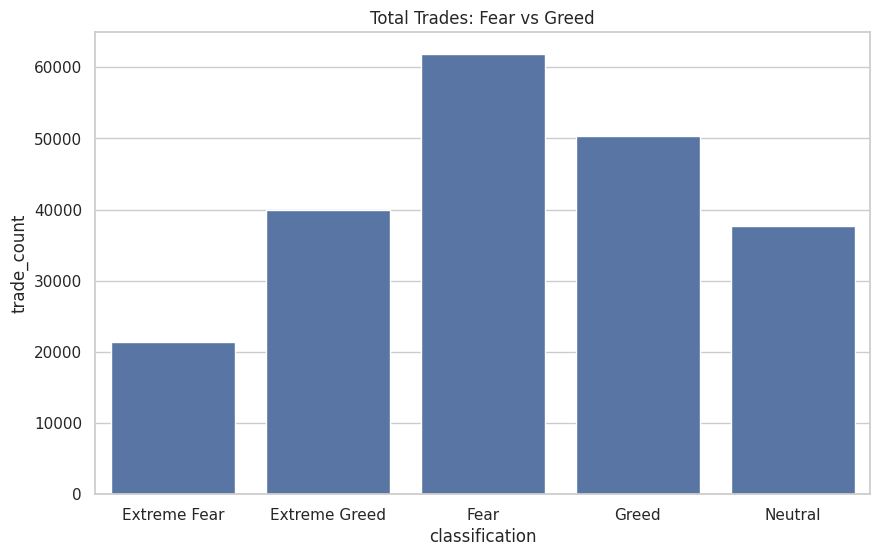

In [433]:
sns.barplot(x='classification', y='trade_count', data=freq_sentiment)
plt.title("Total Trades: Fear vs Greed")
plt.show()


In [434]:
size_sentiment = (
    trade_sentiment
    .groupby('classification')['Size USD']
    .mean()
    .reset_index()
)

size_sentiment


,classification,Size USD
0,Extreme Fear,5349.731843
1,Extreme Greed,3112.251565
2,Fear,7816.109931
3,Greed,5736.884375
4,Neutral,4782.732661


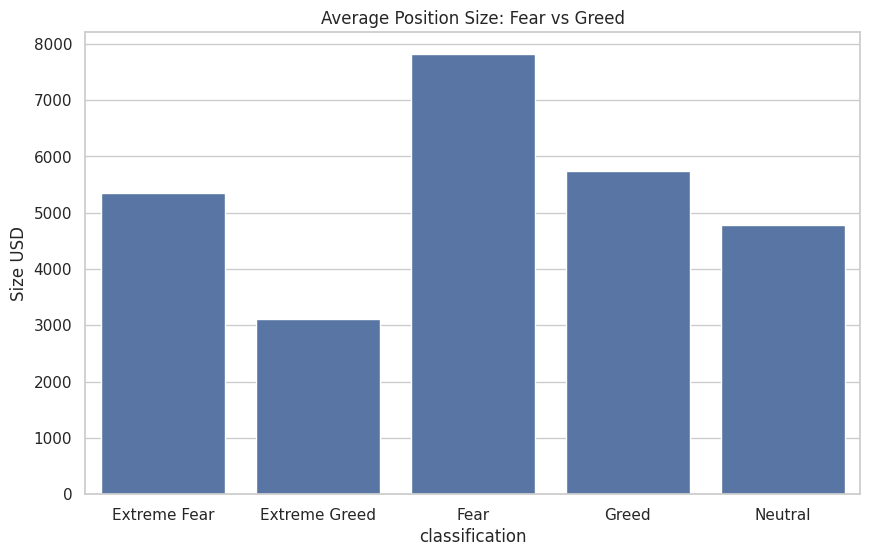

In [435]:
sns.barplot(x='classification', y='Size USD', data=size_sentiment)
plt.title("Average Position Size: Fear vs Greed")
plt.show()



In [436]:
ls_sentiment = (
    trade_sentiment
    .groupby(['classification','Side'])
    .size()
    .unstack()
)

ls_sentiment


Side,BUY,SELL
classification,,
Extreme Fear,10935,10465
Extreme Greed,17940,22052
Fear,30270,31567
Greed,24576,25727
Neutral,18969,18717


In [437]:
ls_sentiment['long_ratio'] = (
    ls_sentiment['BUY'] /
    (ls_sentiment['BUY'] + ls_sentiment['SELL'])
)


In [438]:
leverage_by_trader = trades.groupby('Account')['Size USD'].mean().reset_index()


In [439]:
median_size = leverage_by_trader['Size USD'].median()

leverage_by_trader['segment'] = (
    leverage_by_trader['Size USD'] > median_size
)

leverage_by_trader['segment'] = leverage_by_trader['segment'].map({
    True: 'High Exposure',
    False: 'Low Exposure'
})


In [440]:
segment_perf = daily_data.merge(
    leverage_by_trader[['Account','segment']],
    on='Account'
)

segment_perf.groupby('segment')['Closed PnL'].mean()


,Closed PnL
segment,
High Exposure,6393.955383
Low Exposure,2764.526974


In [441]:
trade_counts = trades.groupby('Account').size().reset_index(name='total_trades')

median_trades = trade_counts['total_trades'].median()

trade_counts['segment'] = trade_counts['total_trades'] > median_trades
trade_counts['segment'] = trade_counts['segment'].map({
    True: 'Frequent',
    False: 'Infrequent'
})


In [442]:
trade_sentiment = trade_sentiment.merge(
    trade_counts[['Account','segment']],
    on='Account'
)

trade_sentiment.groupby('segment')['win'].mean()


,win
segment,
Frequent,0.415438
Infrequent,0.379116


In [443]:
consistency = (
    trades
    .groupby('Account')['Closed PnL']
    .std()
    .reset_index()
)

median_std = consistency['Closed PnL'].median()

consistency['segment'] = consistency['Closed PnL'] < median_std
consistency['segment'] = consistency['segment'].map({
    True: 'Consistent',
    False: 'Volatile'
})


In [444]:
daily_data.merge(
    consistency[['Account','segment']],
    on='Account'
).groupby('segment')['Closed PnL'].mean()


,Closed PnL
segment,
Consistent,1860.674697
Volatile,6899.537343


In [445]:
daily_data = daily_data.sort_values(['Account', 'date'])

daily_data['next_day_pnl'] = (
    daily_data
    .groupby('Account')['Closed PnL']
    .shift(-1)
)

daily_data['profit_bucket'] = (daily_data['next_day_pnl'] > 0).astype(int)

daily_data = daily_data.dropna(subset=['profit_bucket'])



In [446]:
daily_data['rolling_pnl_3'] = (
    daily_data
    .groupby('Account')['Closed PnL']
    .rolling(3)
    .mean()
    .reset_index(0, drop=True)
)



In [447]:
print(daily_data['classification'].unique())


['Extreme Greed' 'Greed' 'Fear' 'Neutral' 'Extreme Fear']


In [448]:
daily_data = pd.get_dummies(daily_data, columns=['classification'], drop_first=True)


In [450]:
classification_cols = [col for col in daily_data.columns if col.startswith('classification_')]
print(classification_cols)


['classification_Extreme Greed', 'classification_Fear', 'classification_Greed', 'classification_Neutral']


In [451]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np

# Feature selection
features = [col for col in daily_data.columns if col not in
            ['Account','date','Closed PnL','next_day_pnl','profit_bucket']]

X = daily_data[features]
y = daily_data['profit_bucket']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Random Forest with better defaults
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [8, 12, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='f1',
    n_jobs=-1
)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

preds = best_model.predict(X_test)

print("Best Parameters:", grid.best_params_)
print(classification_report(y_test, preds))


Best Parameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.45      0.38      0.41       177
           1       0.65      0.71      0.68       291

    accuracy                           0.59       468
   macro avg       0.55      0.55      0.55       468
weighted avg       0.58      0.59      0.58       468



In [452]:
trader_summary = trades.groupby('Account').agg(
    avg_size=('Size USD','mean'),
    win_rate=('win','mean'),
    total_trades=('Closed PnL','count'),
    pnl_std=('Closed PnL','std')
).reset_index()

# Long ratio
long_ratio = trades.pivot_table(index='Account', columns='Side', values='Closed PnL', aggfunc='count', fill_value=0)
long_ratio['long_ratio'] = long_ratio['BUY'] / (long_ratio['BUY'] + long_ratio['SELL'])
trader_summary = trader_summary.merge(long_ratio[['long_ratio']], left_on='Account', right_index=True)

In [453]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

cluster_features = trader_summary[['avg_size','win_rate','total_trades','long_ratio','pnl_std']]

scaler = StandardScaler()
scaled = scaler.fit_transform(cluster_features)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
trader_summary['cluster'] = kmeans.fit_predict(scaled)


In [454]:
cluster_profile = trader_summary.groupby('cluster').mean(numeric_only=True)
cluster_profile


,avg_size,win_rate,total_trades,pnl_std,long_ratio
cluster,,,,,
0,6538.675393,0.375992,1568.600000,2330.861048,0.311080
1,7969.543708,0.343178,6290.187500,661.192006,0.519423
2,2913.423958,0.502471,9339.818182,469.128641,0.448542


In [455]:
!pip install streamlit
!pip install pyngrok

In [456]:
daily_data_dashboard.to_csv("daily_data_dashboard.csv", index=False)
trader_summary.to_csv("trader_summary.csv", index=False)


In [457]:
from pyngrok import ngrok

ngrok.set_auth_token("39a67Ir9A5jKtZ4AvxGCAxeYExg_nVYge3oGofLQhyP1LvuP")



In [458]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(layout="wide")

st.title("📊 Trader Behavior & Sentiment Dashboard")

daily_data = pd.read_csv("daily_data_dashboard.csv")
trader_summary = pd.read_csv("trader_summary.csv")

# --------------------------
# Sidebar
# --------------------------
st.sidebar.header("Filters")

sentiment = st.sidebar.selectbox(
    "Select Sentiment",
    daily_data['classification'].unique()
)

cluster = st.sidebar.selectbox(
    "Select Cluster",
    trader_summary['cluster'].unique()
)

# --------------------------
# Sentiment Analysis
# --------------------------
st.header("Sentiment Performance")

filtered = daily_data[daily_data['classification'] == sentiment]

col1, col2, col3 = st.columns(3)

col1.metric("Avg PnL", round(filtered['Closed PnL'].mean(),2))
col2.metric("Win Rate", round((filtered['Closed PnL']>0).mean(),2))
col3.metric("Trades", len(filtered))

fig = px.line(
    filtered.groupby('date')['Closed PnL'].mean().reset_index(),
    x='date',
    y='Closed PnL',
    title="Average Daily PnL"
)

st.plotly_chart(fig, use_container_width=True)

# --------------------------
# Clustering
# --------------------------
st.header("Trader Archetypes")

cluster_data = trader_summary[trader_summary['cluster'] == cluster]

col1, col2, col3, col4 = st.columns(4)

col1.metric("Avg Size", round(cluster_data['avg_size'].mean(),2))
col2.metric("Win Rate", round(cluster_data['win_rate'].mean(),2))
col3.metric("Trade Freq", round(cluster_data['total_trades'].mean(),2))
col4.metric("PnL Volatility", round(cluster_data['pnl_std'].mean(),2))

fig2 = px.scatter(
    trader_summary,
    x='win_rate',
    y='pnl_std',
    color='cluster',
    size='avg_size',
    title="Behavioral Clusters"
)

st.plotly_chart(fig2, use_container_width=True)

st.title("Trader Sentiment Dashboard")

daily_data = pd.read_csv("daily_data.csv")
trader_summary = pd.read_csv("trader_summary.csv")

sentiment = st.selectbox(
    "Select Sentiment",
    daily_data['classification'].unique()
)

filtered = daily_data[daily_data['classification'] == sentiment]

st.metric("Avg PnL", round(filtered['Closed PnL'].mean(),2))
st.metric("Win Rate", round(filtered['win'].mean(),2))

fig = px.line(
    filtered.groupby('date')['Closed PnL'].mean().reset_index(),
    x="date",
    y="Closed PnL"
)

st.plotly_chart(fig)

st.header("Trader Clusters")
st.dataframe(trader_summary.groupby('cluster').mean(numeric_only=True))


Overwriting app.py


In [459]:
from pyngrok import ngrok
import time

# Start Streamlit server
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

time.sleep(5)

# Create tunnel
public_url = ngrok.connect(8501)

print("Open this link in browser:")
print(public_url)


Open this link in browser:
NgrokTunnel: "https://urgently-proaudience-sincere.ngrok-free.dev" -> "http://localhost:8501"
